<font color=blue> Loading Python libraries/packages... </font>

In [1]:
import numpy as np # math calculations and other matrix, vector calculations
import pandas as pd # dataframe organization
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

<font color=blue> Loading data sets... </font>

In [2]:
# load training data
df_train = pd.read_csv('data/housing_training.csv')
# load test data
df_test = pd.read_csv('data/house_test.csv').dropna()
# load test labels
df_labels = pd.read_csv('data/house_test_labels.csv').dropna()

<font color=blue> View first 5 rows of data: </font>

In [3]:
# view top rows of training data
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.37,33.87,19.0,757.0,148.0,361.0,141.0,6.0200,304200.0,<1H OCEAN
1,-120.86,35.39,23.0,1664.0,355.0,629.0,279.0,2.7344,188300.0,NEAR OCEAN
2,-117.18,33.16,15.0,5923.0,1206.0,3943.0,1006.0,3.1793,159900.0,<1H OCEAN
3,-118.30,34.06,23.0,2512.0,1203.0,3720.0,1118.0,1.7896,322200.0,<1H OCEAN
4,-121.45,38.56,52.0,3170.0,476.0,1027.0,457.0,4.6300,233800.0,INLAND


In [4]:
# view top rows of test data
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.64,38.24,40.0,1974.0,410.0,1039.0,398.0,3.7917,<1H OCEAN
1,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217,INLAND
2,-116.98,32.85,12.0,3570.0,713.0,3321.0,666.0,4.0882,<1H OCEAN
3,-118.42,34.20,27.0,3201.0,970.0,3403.0,948.0,2.2377,<1H OCEAN
4,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211,<1H OCEAN


In [40]:
df_labels.head()

,median_house_value
0,151600.0
1,99200.0
2,134500.0
3,231700.0
4,462900.0


In [5]:
# size of training data (rows)
len(df_train)

13828

In [6]:
# dimensions of training data (rows & columns)
df_train.shape

(13828, 10)

In [7]:
# dimensions of test data
df_test.shape

(6735, 9)

In [8]:
df_labels.shape

(6812, 1)

In [9]:
# complete information of dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 10 columns):
longitude             13828 non-null float64
latitude              13828 non-null float64
housing_median_age    13828 non-null float64
total_rooms           13828 non-null float64
total_bedrooms        13698 non-null float64
population            13828 non-null float64
households            13828 non-null float64
median_income         13828 non-null float64
median_house_value    13828 non-null float64
ocean_proximity       13828 non-null object
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [10]:
# list values of specific column 
df_train['ocean_proximity']

0         <1H OCEAN
1        NEAR OCEAN
2         <1H OCEAN
3         <1H OCEAN
4            INLAND
            ...    
13823     <1H OCEAN
13824     <1H OCEAN
13825     <1H OCEAN
13826      NEAR BAY
13827        INLAND
Name: ocean_proximity, Length: 13828, dtype: object

In [11]:
df_train['ocean_proximity'].unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

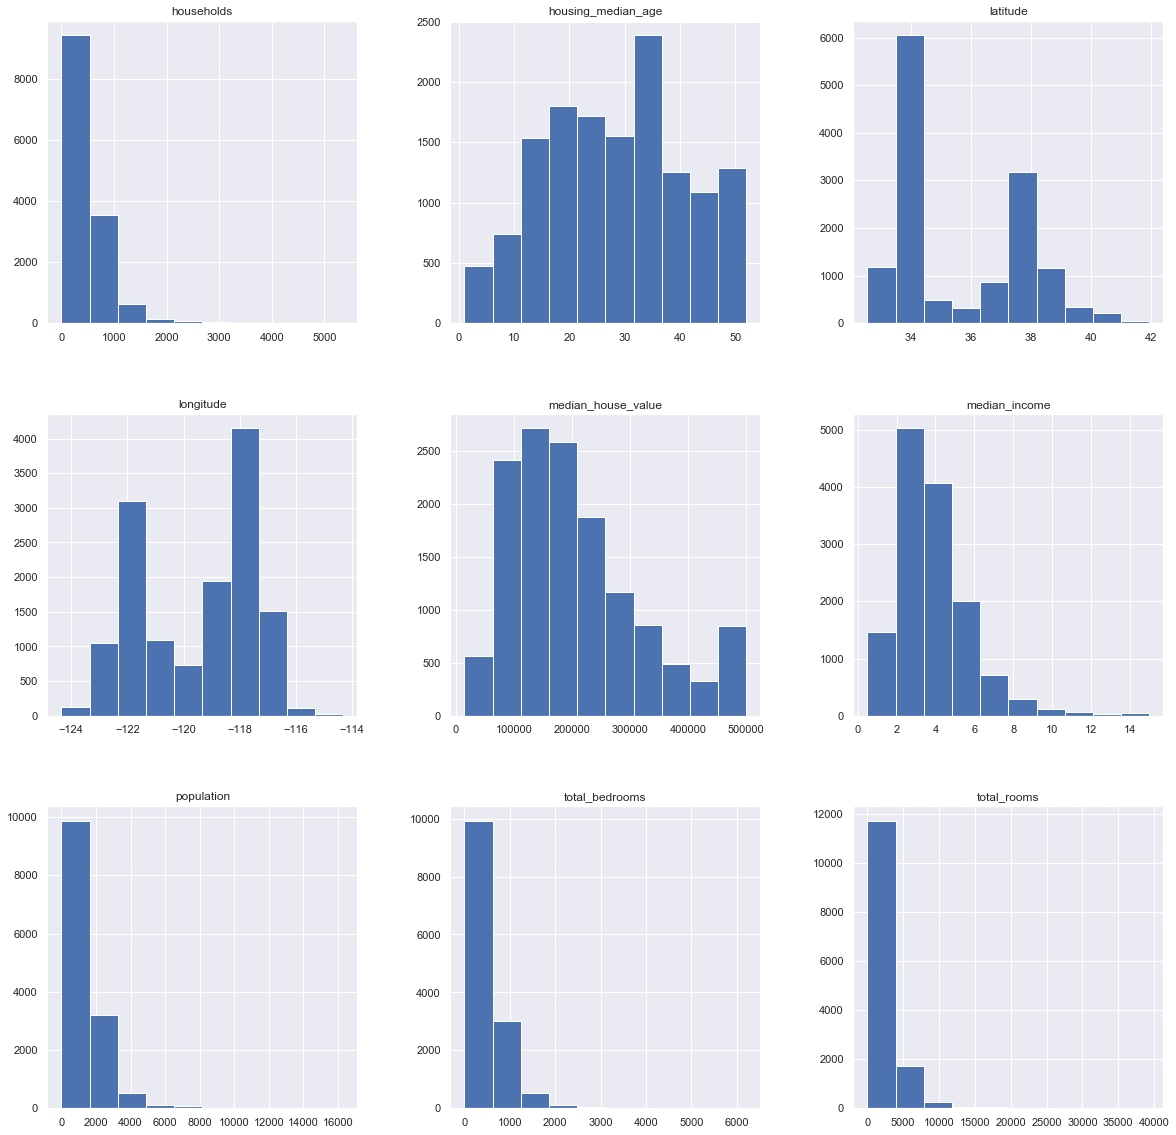

In [12]:
sns.set() # define the plot style
df_train.hist(bins = 10, figsize=(20,20)) # hist: histogram
plt.show()

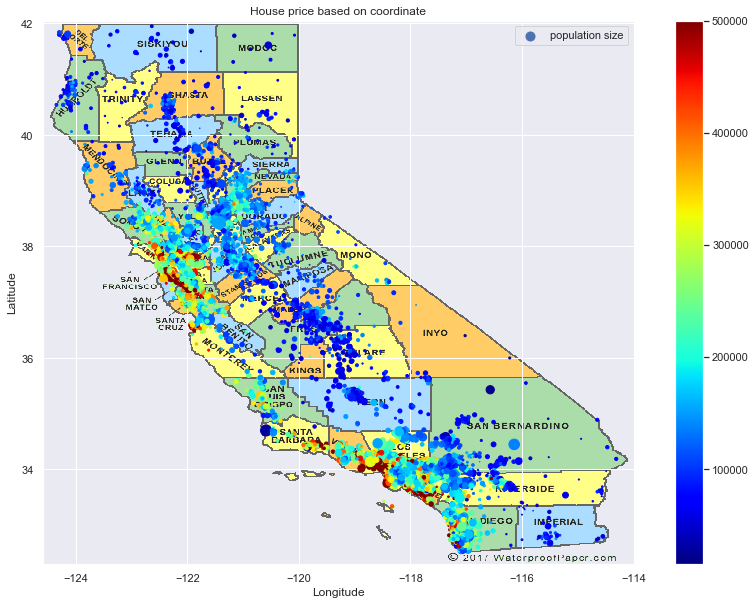

In [13]:
import matplotlib.image as mpimg

california_img=mpimg.imread('data/MTH496_LR_Cali/california-county-map.gif')
plt.figure(figsize=(15,10))
plt.imshow(california_img, extent=[-124.59, -114, 32.3, 42.05]) # x and y axes, lines of longitude and latitude

# in scatter plot: c -> color, s -> size
plt.scatter(df_train['longitude'], df_train['latitude'],
           c=df_train['median_house_value'],
           s=df_train['population']/100, label='population size',
           cmap=plt.get_cmap("jet")
           )
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('House price based on coordinate')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ea86ed0>,
      dtype=object)

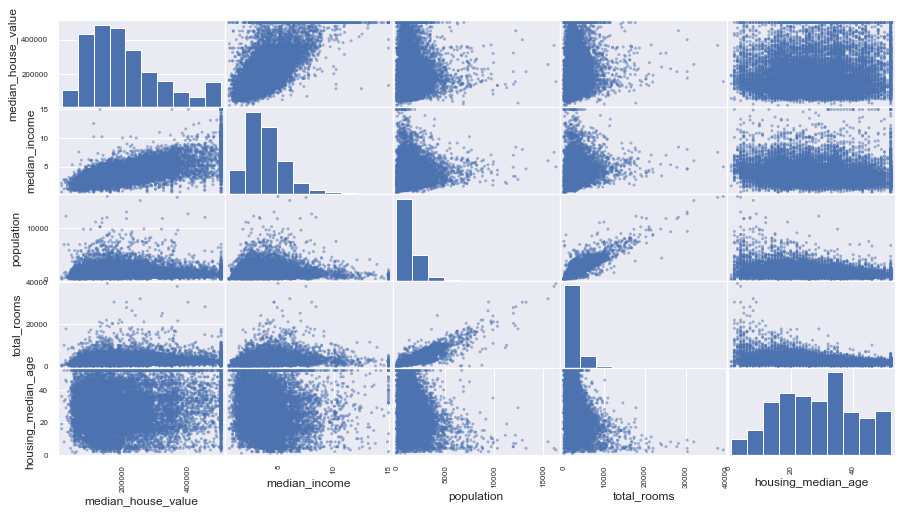

In [14]:
# scatter plot
from pandas.plotting import scatter_matrix
features = ['median_house_value', 'median_income', 'population', 'total_rooms', 'housing_median_age']
scatter_matrix(df_train[features], figsize=(15,8))

In [15]:
# check for missing values ( already previously cleaned with .dropna() )
#   could also assign null spaces the median/average value from other features' values
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        130
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
median = df_train['total_bedrooms'].median() # second option
df_train_fixed = df_train.copy() # copy dataframe
df_train_fixed['total_bedrooms'].fillna(median,
                                       inplace=True) # fill null values with median value of feature

In [17]:
df_train_fixed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
df_test_fixed = df_test.copy()
df_test_fixed['total_bedrooms'].fillna(median, inplace=True)
df_test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [19]:
reg = LinearRegression()

In [20]:
le = LabelEncoder()

In [21]:
le.fit(df_train_fixed['ocean_proximity'])

LabelEncoder()

In [22]:
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [23]:
df_train_fixed['ocean_proximity_labelcoded'] = le.transform(df_train['ocean_proximity'].values)  # encode categorical data
df_test_fixed['ocean_proximity'] = le.transform(df_test['ocean_proximity'].values)

In [30]:
df_train_fixed['ocean_proximity_manually_coded'] = df_train['ocean_proximity'].map({'<1H OCEAN':2, 'INLAND':1, 'ISLAND':5,
                                                                              'NEAR BAY':3, 'NEAR OCEAN':4})
df_test_fixed['ocean_proximity_manually_coded'] = df_test['ocean_proximity'].map({'<1H OCEAN':2, 'INLAND':1, 'ISLAND':5,
                                                                              'NEAR BAY':3, 'NEAR OCEAN':4})

In [25]:
print(df_train_fixed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13828 entries, 0 to 13827
Data columns (total 12 columns):
longitude                         13828 non-null float64
latitude                          13828 non-null float64
housing_median_age                13828 non-null float64
total_rooms                       13828 non-null float64
total_bedrooms                    13828 non-null float64
population                        13828 non-null float64
households                        13828 non-null float64
median_income                     13828 non-null float64
median_house_value                13828 non-null float64
ocean_proximity                   13828 non-null object
ocean_proximity_labelcoded        13828 non-null int64
ocean_proximity_manually_coded    13828 non-null int64
dtypes: float64(9), int64(2), object(1)
memory usage: 1.3+ MB
None


In [42]:
y_train = df_train_fixed['median_house_value']
X_train = df_train_fixed.drop(['median_house_value','ocean_proximity','ocean_proximity_labelcoded'],axis=1) 
X_test = df_test_fixed
X_test = df_test_fixed.drop('ocean_proximity', axis=1 )
y_real = df_labels

In [33]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_manually_coded
0,-122.64,38.24,40.0,1974.0,410.0,1039.0,398.0,3.7917,2
1,-119.05,36.09,9.0,3297.0,568.0,1749.0,568.0,4.0217,1
2,-116.98,32.85,12.0,3570.0,713.0,3321.0,666.0,4.0882,2
3,-118.42,34.20,27.0,3201.0,970.0,3403.0,948.0,2.2377,2
4,-118.47,34.01,41.0,2704.0,557.0,1047.0,478.0,4.4211,2


In [49]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_manually_coded
0,-118.37,33.87,19.0,757.0,148.0,361.0,141.0,6.0200,2
1,-120.86,35.39,23.0,1664.0,355.0,629.0,279.0,2.7344,4
2,-117.18,33.16,15.0,5923.0,1206.0,3943.0,1006.0,3.1793,2
3,-118.30,34.06,23.0,2512.0,1203.0,3720.0,1118.0,1.7896,2
4,-121.45,38.56,52.0,3170.0,476.0,1027.0,457.0,4.6300,1


In [50]:
y_train.head()

0    304200.0
1    188300.0
2    159900.0
3    322200.0
4    233800.0
Name: median_house_value, dtype: float64

In [51]:
X_train.isnull().sum()

longitude                         0
latitude                          0
housing_median_age                0
total_rooms                       0
total_bedrooms                    0
population                        0
households                        0
median_income                     0
ocean_proximity_manually_coded    0
dtype: int64

In [52]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
reg.coef_

array([-3.56560343e+04, -3.59594143e+04,  1.06775666e+03, -5.65506488e+00,
        7.42535642e+01, -4.08669824e+01,  8.06820983e+01,  3.96917951e+04,
        8.69885193e+03])

In [54]:
y_pred = reg.predict(X_test)
y_pred[:10]

array([233223.16417348, 138811.35799337, 148940.37915932, 134877.68622071,
       275610.3048775 , 220549.64965677, 132169.1638361 , 204375.49313497,
       232956.42025706, 135779.73486814])

In [55]:
y_real[:10]

,median_house_value
0,151600.0
1,99200.0
2,134500.0
3,231700.0
4,462900.0
5,140700.0
6,170300.0
7,160300.0
8,101800.0
9,168800.0


In [ ]:
#sns.countplot(df_train['ocean_proximity'])

In [56]:
error = mean_squared_error(y_real[:len(y_pred)], y_pred)  # Take MSE of prediction against given test labels

In [57]:
print("mean squared error:", error)

mean squared error: 22046654921.918568


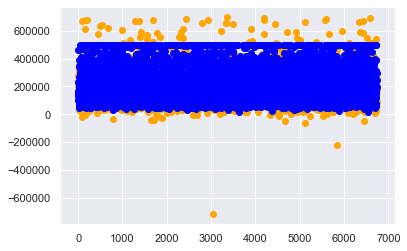

In [48]:
plt.scatter(range(len(y_pred)), y_pred, color="orange")
plt.scatter(range(len(y_pred)), y_real[:len(y_pred)].values, color="blue")
plt.show()